In [423]:
import pandas as pd
import numpy as np

In [424]:
A=pd.read_csv("F:/datascience/Python/adult.csv",na_values=['#NAME?'],names=['age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','income'] )

In [425]:
A.head(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [426]:
A['income']=[0 if '<' in i else 1 for i in A['income']]

In [427]:
A.head(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [428]:
x= A.drop('income',1)
y=A['income']
#y.columns=['Income']

In [429]:
y.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    1
8    1
9    1
Name: income, dtype: int64

In [430]:
x.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [431]:
y.shape

(32561,)

In [432]:
x.shape

(32561, 14)

In [433]:
x['education'].head()

0     Bachelors
1     Bachelors
2       HS-grad
3          11th
4     Bachelors
Name: education, dtype: object

In [434]:
pd.get_dummies(x['education']).head()

,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [435]:
for col_names in x.columns:
    if x[col_names].dtypes=='object':
        unique_categorical= len(x[col_names].unique())
        print("Feature '{col_names} has {unique_categorical} unique categories".format(col_names=col_names, unique_categorical=unique_categorical))

Feature 'workclass has 9 unique categories
Feature 'education has 16 unique categories
Feature 'marital_status has 7 unique categories
Feature 'occupation has 15 unique categories
Feature 'relationship has 6 unique categories
Feature 'race has 5 unique categories
Feature 'sex has 2 unique categories
Feature 'native_country has 42 unique categories


In [436]:
x['native_country'].value_counts().sort_values(ascending=False).head(10)

 United-States    29170
 Mexico             643
 ?                  583
 Philippines        198
 Germany            137
 Canada             121
 Puerto-Rico        114
 El-Salvador        106
 India              100
 Cuba                95
Name: native_country, dtype: int64

In [437]:
x1 = x['native_country'].str.contains("United-States")
x1[1]

True

In [438]:
x['native_country'] = ['United-States' if x1[i]==True else 'Other' for i in range(0,len(x1),1)]
x['native_country']

0        United-States
1        United-States
2        United-States
3        United-States
4                Other
5        United-States
6                Other
7        United-States
8        United-States
9        United-States
10       United-States
11               Other
12       United-States
13       United-States
14               Other
15               Other
16       United-States
17       United-States
18       United-States
19       United-States
20       United-States
21       United-States
22       United-States
23       United-States
24       United-States
25       United-States
26       United-States
27               Other
28       United-States
29       United-States
             ...      
32531    United-States
32532    United-States
32533            Other
32534    United-States
32535    United-States
32536    United-States
32537    United-States
32538    United-States
32539    United-States
32540    United-States
32541    United-States
32542    United-States
32543    Un

In [439]:
x['native_country'].value_counts().sort_values(ascending=False)

United-States    29170
Other             3391
Name: native_country, dtype: int64

In [440]:
todummy_list=['workclass','education','marital_status','occupation','relationship','race','sex','native_country']

In [441]:
def dummy_A(A,todummy_list):
    for i in todummy_list:
        dummies=pd.get_dummies(A[i],prefix=i,dummy_na=False)
        A=A.drop(i,1)
        A=pd.concat([A,dummies],axis=1)
    return A

In [442]:
x=dummy_A(x,todummy_list)
x.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,native_country_Other,native_country_United-States
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
4,28,338409,13,0,0,40,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0


In [443]:
y.shape

(32561,)

In [444]:
x.isnull().sum().sort_values(ascending=True)

age                              0
marital_status_ Separated        0
marital_status_ Widowed          0
occupation_ ?                    0
occupation_ Adm-clerical         0
occupation_ Armed-Forces         0
occupation_ Craft-repair         0
occupation_ Exec-managerial      0
occupation_ Farming-fishing      0
occupation_ Handlers-cleaners    0
occupation_ Machine-op-inspct    0
occupation_ Other-service        0
occupation_ Priv-house-serv      0
occupation_ Prof-specialty       0
occupation_ Protective-serv      0
marital_status_ Never-married    0
occupation_ Sales                0
occupation_ Transport-moving     0
relationship_ Husband            0
relationship_ Not-in-family      0
relationship_ Other-relative     0
relationship_ Own-child          0
relationship_ Unmarried          0
relationship_ Wife               0
race_ Amer-Indian-Eskimo         0
race_ Asian-Pac-Islander         0
race_ Black                      0
race_ Other                      0
race_ White         

In [445]:
#finding the outlier

def find_outlier_tukey(x):
    q1=np.percentile(x,25)
    q3=np.percentile(x,75)
    iqr=q3-q1
    floor=q1- 1.5*iqr
    ceiling=q3 +1.5*iqr
    outlier_indices= list(x.index[(x<floor)|(x>ceiling)])
    outlier_values= list(x[outlier_indices])
    
    return outlier_indices,outlier_values

In [446]:
tukey_indices,tukey_values= find_outlier_tukey(x['age'])

In [447]:
np.sort(tukey_values)

array([79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79,
       79, 79, 79, 79, 79, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80,
       80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 81, 81, 81, 81, 81, 81, 81,
       81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 82, 82, 82, 82,
       82, 82, 82, 82, 82, 82, 82, 82, 83, 83, 83, 83, 83, 83, 84, 84, 84,
       84, 84, 84, 84, 84, 84, 84, 85, 85, 85, 86, 87, 88, 88, 88, 90, 90,
       90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90,
       90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90,
       90, 90, 90, 90, 90, 90, 90], dtype=int64)

In [448]:
#distribution of features

import matplotlib.pyplot as plt
%matplotlib inline

In [449]:
def plot_histogram(x):
    plt.hist(x,color='grey',alpha=0.5)
    plt.title("Histogram of '{var_name}'".format(var_name=x.name))
    plt.xlabel("value")
    plt.ylabel("Frequency")
    plt.show()

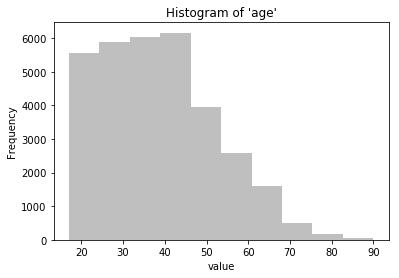

In [450]:
plot_histogram(x['age'])

In [451]:
#adding new features

from itertools import combinations
from sklearn.preprocessing import PolynomialFeatures

In [452]:
x.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,native_country_Other,native_country_United-States
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
4,28,338409,13,0,0,40,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0


In [453]:
#def add_interactions(df):
   # combos=list(combinations(list(df.columns),2))
    #colnames=list(df.columns) + ['_'.join(i) for i in combos]
    #poly=PolynomialFeatures(interaction_only=True,include_bias=False)
    #df=poly.fit_transform(df)
    #df=pd.DataFrame(df)
    #df.columns=colnames
    
    #noint_indices=[i for i,j in enumerate(list((df==0).all())) if j]
    #df=df.drop(A.columns[noint_indices],axis=1)
    #return df

In [454]:
#x=add_interactions(x)
x.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,native_country_Other,native_country_United-States
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
4,28,338409,13,0,0,40,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0


In [455]:
from sklearn.decomposition import PCA

pca=PCA(n_components=10)
X_pca=pd.DataFrame(pca.fit_transform(x))
X_pca.head()

,0,1,2,3,4,5,6,7,8,9
0,-112262.329664,1099.917213,-89.796475,-0.815162,-0.387896,-2.901179,0.459526,1.095618,0.260568,0.447140
1,-106467.395741,-1074.257792,-93.353760,2.959674,-29.135217,-3.767809,-1.407922,0.056743,0.277950,0.394955
2,25867.604154,-1078.283626,-88.157905,-0.024205,-0.108459,1.015051,0.328381,0.723346,-0.880360,0.154485
3,44942.603983,-1078.862069,-87.382449,14.597719,-4.235074,2.985717,-0.684408,-0.074189,0.104504,-0.466017
4,148630.604092,-1082.021023,-83.374488,-8.371082,2.629774,-3.260476,0.270417,-1.367989,-0.034647,-0.412135


In [456]:
x.shape

(32561, 68)

In [457]:
y.shape

(32561,)

In [469]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=32)
ytest.shape

(6513,)

In [470]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [471]:
lr=LogisticRegression()
model=lr.fit(xtrain,ytrain)
pred=model.predict(xtest)

In [472]:
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [473]:
pred_prob=model.predict_proba(xtest)

In [474]:
xtest["predicted"]=pred
xtest["actual"]=ytest
xtest

C:\Users\N N kundan\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\N N kundan\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,native_country_Other,native_country_United-States,predicted,actual
24507,57,89182,9,0,0,40,0,0,0,0,...,0,0,0,1,1,0,0,1,0,0
28351,33,159548,10,0,0,38,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
717,19,378418,9,0,0,40,0,0,0,0,...,0,0,0,1,1,0,0,1,0,0
19417,44,151985,14,0,0,24,0,0,0,0,...,0,0,0,1,1,0,0,1,0,1
16746,23,406641,10,0,0,18,0,0,0,0,...,0,0,0,1,1,0,0,1,0,0
14788,31,128016,13,0,0,40,0,0,1,0,...,0,0,0,1,1,0,0,1,0,0
4562,29,370494,9,0,0,40,0,0,0,0,...,0,0,0,1,1,0,1,0,0,0
879,19,376540,9,0,0,30,0,0,0,0,...,0,0,0,1,1,0,0,1,0,0
28110,34,157466,9,0,0,45,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
27591,19,263932,9,0,0,20,0,0,0,0,...,0,0,0,1,1,0,0,1,0,0


In [475]:
import sklearn.metrics as sm

In [476]:
fpr, tpr, threshold = sm.roc_curve(ytest, pred_prob[:,1])
roc_auc = sm.auc(fpr, tpr)

In [477]:
roc_auc

0.60164264268529866

In [467]:
from sklearn.metrics import confusion_matrix

In [468]:
CM=confusion_matrix(ytest,pred)
CM

array([[4784,  158],
       [1148,  423]])